In [21]:
import numpy as np
import os

In [22]:
PATH = os.getcwd()
PATH = PATH.split(os.path.sep)
if "src" in PATH:
    PATH.remove("src")
PATH = os.path.sep.join(PATH)

In [23]:
gp = np.load(os.path.join(PATH,'AutoAM_GP_test_run.npy'), allow_pickle=True)
rf = np.load(os.path.join(PATH,'AutoAM_RF_test_run.npy'), allow_pickle=True)

In [24]:
gp = {
    "index_collection": gp[0],
    "X_collection": gp[1],
    "y_collection": gp[2],
    "TopCount_collection": gp[3],
    "total_time": gp[4]
}
rf = {
    "index_collection": rf[0],
    "X_collection": rf[1],
    "y_collection": rf[2],
    "TopCount_collection": rf[3],
    "total_time": rf[4]
}

In [25]:
n_models = len(gp['TopCount_collection'])
n_iter = len(gp['TopCount_collection'][0])

gp_avg = list()
for i in range(n_iter):
    avg = 0
    for j in range(n_models):
        val = gp['TopCount_collection'][j][i]
        avg += val
    avg = avg / n_models
    avg /= 5
    gp_avg.append(avg)
rf_avg = list()
for i in range(n_iter):
    avg = 0
    for j in range(n_models):
        val = rf['TopCount_collection'][j][i]
        avg += val
    avg = avg / n_models
    avg /= 5
    rf_avg.append(avg)

In [27]:
def P_rand(nn):
    x_random = np.arange(nn)
    
    M = 0.05
    N = nn
    
    P = np.array([None for i in x_random])
    E = np.array([None for i in x_random])
    A = np.array([None for i in x_random])
    cA = np.array([None for i in x_random])
    
    P[0] = M / N
    E[0] = M / N
    A[0] = M / N
    cA[0] = A[0]
    

    for i in x_random[1:]:
        P[i] = (M - E[i-1]) / (N - i)
        E[i] = np.sum(P[:(i+1)])
        j = 0
        A_i = P[i]
        while j < i:
            A_i *= (1 - P[j])
            j+=1
        A[i] = A_i
        cA[i] = np.sum(A[:(i+1)])
        
    return E / M, cA

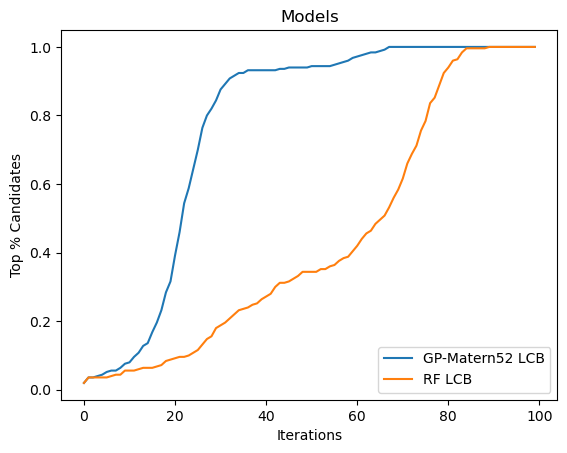

In [29]:
import matplotlib.pyplot as plt
N = 100

plt.plot(gp_avg, label='GP-Matern52 LCB')
plt.plot(rf_avg, label='RF LCB')
#plt.plot(np.arange(N)+1, P_rand(N)[0],'--',color='black',label='random baseline', linewidth=3.5)

# Adding labels and title
plt.xlabel('Iterations')
plt.ylabel('Top % Candidates')
plt.title('Models')

# Adding a legend
plt.legend()

# Displaying the graph
plt.show()